In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

In [3]:
df_normal = pd.read_csv('/Users/hongggenzhang/Desktop/ECG/data/data_normal_clean.csv', sep = ',')
df_normal

,QRS_Duration__ms_C,R_T_Axis_deviation,Group,Gender,Ventricular_Rate_C,P_Axis_C,R_Axis_C,T_Axis_C,QTc_Calculation_C,QTc_Bazett_C,...,P_Peak_Amplitude_C_aVR,Q_Peak_Amplitude_C_aVR,R_Peak_Amplitude_C_aVR,S_Peak_Amplitude_C_aVR,T_Peak_Amplitude_C_aVR,Q_Area_C_aVR,R_Area_C_aVR,S_Area_C_aVR,T_Area_C_aVR,Summated_QRS_integral_aVR
0,80.0,-26.0,38.0,0,70.0,3.0,8.0,34.0,453.0,144,...,-87.0,429.0,185.0,0.0,-190.0,896.0,369.0,0.0,-2298.0,1265.0
1,80.0,34.0,38.0,0,78.0,34.0,42.0,8.0,483.0,153,...,-83.0,1093.0,0.0,0.0,-219.0,1274.0,0.0,0.0,-1586.0,1274.0
2,88.0,24.0,38.0,0,86.0,15.0,59.0,35.0,430.0,136,...,-73.0,576.0,0.0,0.0,-214.0,711.0,0.0,0.0,-1092.0,711.0
3,96.0,-27.0,21.0,0,103.0,38.0,90.0,117.0,466.0,147,...,-185.0,722.0,434.0,0.0,24.0,705.0,524.0,0.0,-15.0,1229.0
4,74.0,-48.0,36.0,1,94.0,50.0,24.0,72.0,427.0,136,...,-122.0,1303.0,78.0,0.0,-126.0,1122.0,64.0,0.0,-543.0,1186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56401,60.0,24.0,9.0,0,99.0,40.0,66.0,42.0,418.0,132,...,-117.0,585.0,483.0,0.0,-439.0,362.0,334.0,0.0,-1997.0,696.0
56402,78.0,47.0,9.0,1,99.0,54.0,103.0,56.0,449.0,142,...,-92.0,0.0,278.0,615.0,-434.0,0.0,148.0,387.0,-2196.0,535.0
56403,88.0,-26.0,9.0,0,99.0,59.0,34.0,60.0,432.0,136,...,-126.0,810.0,385.0,0.0,-346.0,675.0,402.0,0.0,-1766.0,1077.0
56404,74.0,47.0,10.0,1,99.0,74.0,73.0,26.0,445.0,142,...,-146.0,1118.0,83.0,0.0,-170.0,895.0,48.0,0.0,-883.0,943.0


In [5]:
big_group = [[1],[2],[3,4],[5,6],[7,8,9],[10,11,12,13],[14,15,16,17],[18,19,20,21],[22,23,24,25,26],
             [27,28,29,30,31,32,33,34,35,36,37,38]]
group_dic = {}
big_group_id = 1
for group_list in big_group:
    for i in group_list:
        group_dic[i] = big_group_id
    big_group_id+=1

In [6]:
group_num = df_normal['Group'].values
new_list  = []
for i in range(len(group_num)):
    new_list.append(group_dic[int(group_num[i])])
new_df = pd.DataFrame({'Group': new_list})

In [7]:
df_normal.update(new_df)
df_normal

,QRS_Duration__ms_C,R_T_Axis_deviation,Group,Gender,Ventricular_Rate_C,P_Axis_C,R_Axis_C,T_Axis_C,QTc_Calculation_C,QTc_Bazett_C,...,P_Peak_Amplitude_C_aVR,Q_Peak_Amplitude_C_aVR,R_Peak_Amplitude_C_aVR,S_Peak_Amplitude_C_aVR,T_Peak_Amplitude_C_aVR,Q_Area_C_aVR,R_Area_C_aVR,S_Area_C_aVR,T_Area_C_aVR,Summated_QRS_integral_aVR
0,80.0,-26.0,10.0,0,70.0,3.0,8.0,34.0,453.0,144,...,-87.0,429.0,185.0,0.0,-190.0,896.0,369.0,0.0,-2298.0,1265.0
1,80.0,34.0,10.0,0,78.0,34.0,42.0,8.0,483.0,153,...,-83.0,1093.0,0.0,0.0,-219.0,1274.0,0.0,0.0,-1586.0,1274.0
2,88.0,24.0,10.0,0,86.0,15.0,59.0,35.0,430.0,136,...,-73.0,576.0,0.0,0.0,-214.0,711.0,0.0,0.0,-1092.0,711.0
3,96.0,-27.0,8.0,0,103.0,38.0,90.0,117.0,466.0,147,...,-185.0,722.0,434.0,0.0,24.0,705.0,524.0,0.0,-15.0,1229.0
4,74.0,-48.0,10.0,1,94.0,50.0,24.0,72.0,427.0,136,...,-122.0,1303.0,78.0,0.0,-126.0,1122.0,64.0,0.0,-543.0,1186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56401,60.0,24.0,5.0,0,99.0,40.0,66.0,42.0,418.0,132,...,-117.0,585.0,483.0,0.0,-439.0,362.0,334.0,0.0,-1997.0,696.0
56402,78.0,47.0,5.0,1,99.0,54.0,103.0,56.0,449.0,142,...,-92.0,0.0,278.0,615.0,-434.0,0.0,148.0,387.0,-2196.0,535.0
56403,88.0,-26.0,5.0,0,99.0,59.0,34.0,60.0,432.0,136,...,-126.0,810.0,385.0,0.0,-346.0,675.0,402.0,0.0,-1766.0,1077.0
56404,74.0,47.0,6.0,1,99.0,74.0,73.0,26.0,445.0,142,...,-146.0,1118.0,83.0,0.0,-170.0,895.0,48.0,0.0,-883.0,943.0


In [8]:
ageset = [1,2,3,4,5,6,7,8,9]
df_normal1 = df_normal.loc[df_normal['Group'].isin(ageset)]
df_normal1

,QRS_Duration__ms_C,R_T_Axis_deviation,Group,Gender,Ventricular_Rate_C,P_Axis_C,R_Axis_C,T_Axis_C,QTc_Calculation_C,QTc_Bazett_C,...,P_Peak_Amplitude_C_aVR,Q_Peak_Amplitude_C_aVR,R_Peak_Amplitude_C_aVR,S_Peak_Amplitude_C_aVR,T_Peak_Amplitude_C_aVR,Q_Area_C_aVR,R_Area_C_aVR,S_Area_C_aVR,T_Area_C_aVR,Summated_QRS_integral_aVR
3,96.0,-27.0,8.0,0,103.0,38.0,90.0,117.0,466.0,147,...,-185.0,722.0,434.0,0.0,24.0,705.0,524.0,0.0,-15.0,1229.0
6,96.0,61.0,9.0,0,147.0,97.0,20.0,-41.0,519.0,165,...,-24.0,878.0,341.0,0.0,-78.0,1874.0,905.0,0.0,-420.0,2779.0
14,86.0,39.0,9.0,1,62.0,49.0,73.0,34.0,401.0,127,...,-102.0,976.0,0.0,0.0,-400.0,1125.0,0.0,0.0,-2418.0,1125.0
19,74.0,45.0,9.0,0,51.0,52.0,90.0,45.0,446.0,141,...,-126.0,844.0,166.0,0.0,-410.0,806.0,82.0,0.0,-2608.0,888.0
25,78.0,33.0,6.0,0,100.0,54.0,69.0,36.0,420.0,133,...,-112.0,0.0,68.0,864.0,-273.0,0.0,29.0,750.0,-1205.0,779.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56401,60.0,24.0,5.0,0,99.0,40.0,66.0,42.0,418.0,132,...,-117.0,585.0,483.0,0.0,-439.0,362.0,334.0,0.0,-1997.0,696.0
56402,78.0,47.0,5.0,1,99.0,54.0,103.0,56.0,449.0,142,...,-92.0,0.0,278.0,615.0,-434.0,0.0,148.0,387.0,-2196.0,535.0
56403,88.0,-26.0,5.0,0,99.0,59.0,34.0,60.0,432.0,136,...,-126.0,810.0,385.0,0.0,-346.0,675.0,402.0,0.0,-1766.0,1077.0
56404,74.0,47.0,6.0,1,99.0,74.0,73.0,26.0,445.0,142,...,-146.0,1118.0,83.0,0.0,-170.0,895.0,48.0,0.0,-883.0,943.0


In [26]:
#df_gender = df_normal1[df_normal1['Gender']==0]
df_gender = df_normal1
len(df_gender)

30092

Text(0.5, 1.0, 'Histogram of Group (female)')

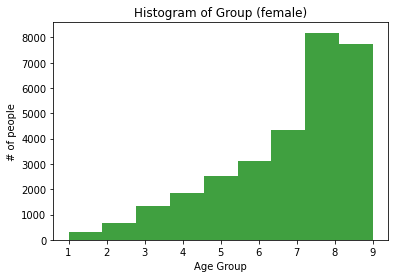

In [27]:
plt.hist(df_gender['Group'].values,len(set(df_gender['Group'])), density=False, facecolor='g', alpha=0.75)
plt.xlabel('Age Group')
plt.ylabel('# of people')
plt.title('Histogram of Group (female)')

In [28]:
df_test = df_gender.sample(frac=0.2)

In [29]:
idx_test = df_test.index
idx_all = df_gender.index
idx_train_valid = idx_all.difference(idx_test)
print(len(idx_test))
print(len(idx_train_valid))
#df_train = df_male.iloc[list(idx_train)]
df_train_valid = df_gender[df_gender.index.isin(list(idx_train_valid))]
df_train_valid

6018
24074


,QRS_Duration__ms_C,R_T_Axis_deviation,Group,Gender,Ventricular_Rate_C,P_Axis_C,R_Axis_C,T_Axis_C,QTc_Calculation_C,QTc_Bazett_C,...,P_Peak_Amplitude_C_aVR,Q_Peak_Amplitude_C_aVR,R_Peak_Amplitude_C_aVR,S_Peak_Amplitude_C_aVR,T_Peak_Amplitude_C_aVR,Q_Area_C_aVR,R_Area_C_aVR,S_Area_C_aVR,T_Area_C_aVR,Summated_QRS_integral_aVR
6,96.0,61.0,9.0,0,147.0,97.0,20.0,-41.0,519.0,165,...,-24.0,878.0,341.0,0.0,-78.0,1874.0,905.0,0.0,-420.0,2779.0
14,86.0,39.0,9.0,1,62.0,49.0,73.0,34.0,401.0,127,...,-102.0,976.0,0.0,0.0,-400.0,1125.0,0.0,0.0,-2418.0,1125.0
25,78.0,33.0,6.0,0,100.0,54.0,69.0,36.0,420.0,133,...,-112.0,0.0,68.0,864.0,-273.0,0.0,29.0,750.0,-1205.0,779.0
26,70.0,35.0,6.0,1,100.0,27.0,63.0,28.0,420.0,133,...,-112.0,0.0,239.0,1757.0,-249.0,0.0,93.0,1580.0,-1119.0,1673.0
27,78.0,8.0,6.0,1,100.0,29.0,73.0,65.0,433.0,137,...,-131.0,1352.0,517.0,0.0,-356.0,1108.0,545.0,0.0,-2004.0,1653.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56401,60.0,24.0,5.0,0,99.0,40.0,66.0,42.0,418.0,132,...,-117.0,585.0,483.0,0.0,-439.0,362.0,334.0,0.0,-1997.0,696.0
56402,78.0,47.0,5.0,1,99.0,54.0,103.0,56.0,449.0,142,...,-92.0,0.0,278.0,615.0,-434.0,0.0,148.0,387.0,-2196.0,535.0
56403,88.0,-26.0,5.0,0,99.0,59.0,34.0,60.0,432.0,136,...,-126.0,810.0,385.0,0.0,-346.0,675.0,402.0,0.0,-1766.0,1077.0
56404,74.0,47.0,6.0,1,99.0,74.0,73.0,26.0,445.0,142,...,-146.0,1118.0,83.0,0.0,-170.0,895.0,48.0,0.0,-883.0,943.0


In [30]:
df_valid = df_train_valid.sample(frac=0.1)
df_valid

,QRS_Duration__ms_C,R_T_Axis_deviation,Group,Gender,Ventricular_Rate_C,P_Axis_C,R_Axis_C,T_Axis_C,QTc_Calculation_C,QTc_Bazett_C,...,P_Peak_Amplitude_C_aVR,Q_Peak_Amplitude_C_aVR,R_Peak_Amplitude_C_aVR,S_Peak_Amplitude_C_aVR,T_Peak_Amplitude_C_aVR,Q_Area_C_aVR,R_Area_C_aVR,S_Area_C_aVR,T_Area_C_aVR,Summated_QRS_integral_aVR
53182,66.0,31.0,4.0,0,120.0,28.0,86.0,55.0,409.0,130,...,-97.0,1083.0,53.0,0.0,-214.0,884.0,25.0,0.0,-900.0,909.0
5248,68.0,19.0,8.0,0,74.0,23.0,68.0,49.0,444.0,140,...,-87.0,634.0,0.0,0.0,-151.0,588.0,0.0,0.0,-842.0,588.0
29250,46.0,53.0,1.0,0,98.0,43.0,112.0,59.0,505.0,160,...,-107.0,395.0,219.0,0.0,0.0,213.0,115.0,0.0,-828.0,328.0
26497,80.0,4.0,6.0,0,91.0,37.0,51.0,47.0,440.0,139,...,-131.0,0.0,141.0,1040.0,-527.0,0.0,78.0,990.0,-2914.0,1068.0
3218,76.0,21.0,7.0,0,67.0,0.0,81.0,60.0,395.0,125,...,-73.0,922.0,112.0,0.0,-385.0,848.0,55.0,0.0,-1816.0,903.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17575,106.0,41.0,9.0,1,74.0,49.0,68.0,27.0,448.0,142,...,-87.0,0.0,39.0,1279.0,-209.0,0.0,22.0,1951.0,-1460.0,1973.0
11554,88.0,12.0,9.0,0,96.0,26.0,19.0,7.0,450.0,142,...,-87.0,1010.0,185.0,0.0,-346.0,976.0,187.0,0.0,-2032.0,1163.0
28529,42.0,94.0,2.0,0,213.0,46.0,108.0,14.0,357.0,113,...,-131.0,0.0,136.0,517.0,-273.0,0.0,39.0,246.0,-890.0,285.0
37881,54.0,125.0,1.0,0,170.0,65.0,121.0,-4.0,437.0,139,...,-136.0,0.0,83.0,312.0,-107.0,0.0,25.0,133.0,-691.0,158.0


In [31]:
idx_valid = df_valid.index
idx_all = df_train_valid.index
idx_train = idx_all.difference(idx_valid)
print(len(idx_valid))
print(len(idx_train))
#df_train = df_male.iloc[list(idx_train)]
df_train = df_train_valid[df_train_valid.index.isin(list(idx_train))]
df_train

2407
21667


,QRS_Duration__ms_C,R_T_Axis_deviation,Group,Gender,Ventricular_Rate_C,P_Axis_C,R_Axis_C,T_Axis_C,QTc_Calculation_C,QTc_Bazett_C,...,P_Peak_Amplitude_C_aVR,Q_Peak_Amplitude_C_aVR,R_Peak_Amplitude_C_aVR,S_Peak_Amplitude_C_aVR,T_Peak_Amplitude_C_aVR,Q_Area_C_aVR,R_Area_C_aVR,S_Area_C_aVR,T_Area_C_aVR,Summated_QRS_integral_aVR
6,96.0,61.0,9.0,0,147.0,97.0,20.0,-41.0,519.0,165,...,-24.0,878.0,341.0,0.0,-78.0,1874.0,905.0,0.0,-420.0,2779.0
14,86.0,39.0,9.0,1,62.0,49.0,73.0,34.0,401.0,127,...,-102.0,976.0,0.0,0.0,-400.0,1125.0,0.0,0.0,-2418.0,1125.0
25,78.0,33.0,6.0,0,100.0,54.0,69.0,36.0,420.0,133,...,-112.0,0.0,68.0,864.0,-273.0,0.0,29.0,750.0,-1205.0,779.0
26,70.0,35.0,6.0,1,100.0,27.0,63.0,28.0,420.0,133,...,-112.0,0.0,239.0,1757.0,-249.0,0.0,93.0,1580.0,-1119.0,1673.0
27,78.0,8.0,6.0,1,100.0,29.0,73.0,65.0,433.0,137,...,-131.0,1352.0,517.0,0.0,-356.0,1108.0,545.0,0.0,-2004.0,1653.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56400,76.0,-2.0,5.0,1,99.0,68.0,62.0,64.0,418.0,132,...,-107.0,0.0,48.0,898.0,-332.0,0.0,17.0,668.0,-1678.0,685.0
56401,60.0,24.0,5.0,0,99.0,40.0,66.0,42.0,418.0,132,...,-117.0,585.0,483.0,0.0,-439.0,362.0,334.0,0.0,-1997.0,696.0
56402,78.0,47.0,5.0,1,99.0,54.0,103.0,56.0,449.0,142,...,-92.0,0.0,278.0,615.0,-434.0,0.0,148.0,387.0,-2196.0,535.0
56404,74.0,47.0,6.0,1,99.0,74.0,73.0,26.0,445.0,142,...,-146.0,1118.0,83.0,0.0,-170.0,895.0,48.0,0.0,-883.0,943.0


In [32]:
df_train = df_train.reset_index(drop=True)
df_train.to_csv('/Users/hongggenzhang/Desktop/ECG/data/normal_AllGender/train.csv',index=False)
df_test = df_test.reset_index(drop=True)
df_test.to_csv('/Users/hongggenzhang/Desktop/ECG/data/normal_AllGender/test.csv',index=False)

df_valid = df_valid.reset_index(drop=True)
df_valid.to_csv('/Users/hongggenzhang/Desktop/ECG/data/normal_AllGender/valid.csv',index=False)

In [33]:
df_train.mean()

QRS_Duration__ms_C             81.324318
R_T_Axis_deviation             28.338718
Group                           6.983800
Gender                          0.420409
Ventricular_Rate_C             90.427516
                                ...     
Q_Area_C_aVR                  457.003092
R_Area_C_aVR                  122.339826
S_Area_C_aVR                  457.525684
T_Area_C_aVR                -1666.138044
Summated_QRS_integral_aVR    1036.868602
Length: 170, dtype: float64

In [34]:
df_test.mean()

QRS_Duration__ms_C             81.142240
R_T_Axis_deviation             28.541210
Group                           6.959455
Gender                          0.412263
Ventricular_Rate_C             90.685278
                                ...     
Q_Area_C_aVR                  454.099369
R_Area_C_aVR                  119.259056
S_Area_C_aVR                  453.057494
T_Area_C_aVR                -1664.297773
Summated_QRS_integral_aVR    1026.415919
Length: 170, dtype: float64

In [35]:
df_train.var()

QRS_Duration__ms_C              179.071172
R_T_Axis_deviation              959.919835
Group                             3.919935
Gender                            0.243677
Ventricular_Rate_C              812.432148
                                 ...      
Q_Area_C_aVR                 253636.957758
R_Area_C_aVR                  39388.665322
S_Area_C_aVR                 347640.821031
T_Area_C_aVR                 475630.387248
Summated_QRS_integral_aVR    183585.701602
Length: 170, dtype: float64

In [36]:
df_test.var()

QRS_Duration__ms_C              179.515413
R_T_Axis_deviation              972.459412
Group                             4.019629
Gender                            0.242343
Ventricular_Rate_C              828.140920
                                 ...      
Q_Area_C_aVR                 246717.564995
R_Area_C_aVR                  36130.308315
S_Area_C_aVR                 339642.713330
T_Area_C_aVR                 466800.494663
Summated_QRS_integral_aVR    173961.799228
Length: 170, dtype: float64